In [1]:
import numpy as np
from numpy import linalg
import math
import heapq as hp
import matplotlib.pyplot as plt
from matplotlib import colors

Question 1

In [ ]:
n=int(input('enter n: '))
grd=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    grd[i][j]=4
b=int(input('num of blocked: '))
unreach = []

print('now enter coordinates')
for i in range(b):
  x=int(input())
  y=int(input())
  grd[x][y]=-1
  unreach.append([x,y])

print('enter start')
x=int(input())
y=int(input())
st=[x,y]
grd[x][y]=0

print('enter coordinates of goals')
x=int(input())
y=int(input())
grd[x][y]=1
goal=[x,y]


enter n: 5
num of blocked: 1
now enter coordinates
2
2
enter start
0
0
enter coordinates of goals
4
4


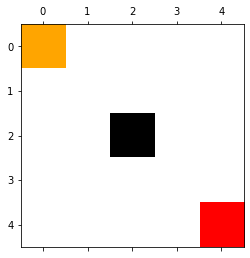

In [ ]:
#grd = generate(n,unreach,st,goal)
#block -1,start 0,goal 1,frontier 2,exp 3,unexp 4
col=colors.ListedColormap(['black','orange','red','green','blue','white'])
bound = [-1.5,-0.5,0.5,1.5,2.5,3.5,4.5]
nor = colors.BoundaryNorm(bound, col.N)

def disp(grd):
  n=len(grd)
  im=np.array(grd)
  plt.matshow(im,cmap=col,norm=nor)
  plt.show()

disp(grd)

In [ ]:
dx=[1,0,-1,0]
dy=[0,1,0,-1]

def ser(grid,src,gol,t):
  n=len(grid)
  vis=np.zeros((n,n))
  predx=np.zeros((n,n),dtype=int)
  predy=np.zeros((n,n),dtype=int)
  d=np.zeros((n,n),dtype=int)
  for i in range(n):
    for j in range(n):
      predx[i][j]=-10
      predy[i][j]=-10

  q=[]
  condt=1
  x=src[0]
  y=src[1]
  hp.heappush(q,[0,x,y])
  c=1
  vis[x][y]=1
  d[x][y]=0
  
  while(len(q)>0 and condt):
    z,x,y=hp.heappop(q)
    if(grid[x][y]==2):  #if frontier
      grid[x][y]=3      #then explored
    for i in range(4):
      x1=x+dx[i]
      y1=y+dy[i]
      if(x1>-1 and x1<n and y1>-1 and y1<n):
        if(grid[x1][y1]!=-1 and vis[x1][y1]==0):
          vis[x1][y1]=1
          predx[x1][y1]=x
          predy[x1][y1]=y
          if(grid[x1][y1]!=1):  #not goal
            grid[x1][y1]=2      #frontier
          else:
            condt=0
          hp.heappush(q,[d[x1][y1] + abs(goal[0]-x1) + abs(goal[1]-y1),x1,y1])
          c+=1
    disp(grid)
  #print(gol)
  x,y=gol
  path=[]
  print(x,y)
  while(x!=-10 and y!=-10):
    print(x,y)
    path.append([x,y])
    x,y=predx[x][y],predy[x][y]
  path.reverse()
  if(path[0]==src):
    print(*path,sep="--")
  else:
    print('No path')

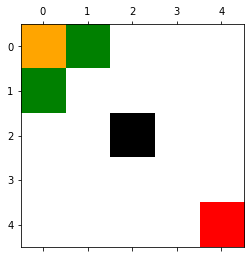

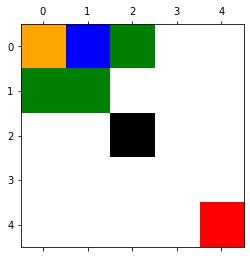

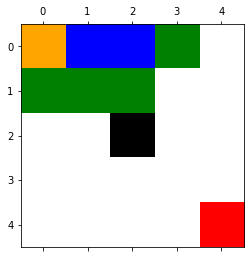

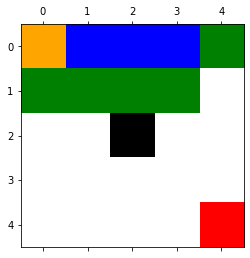

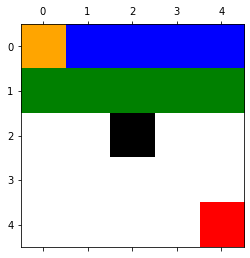

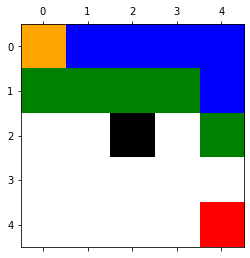

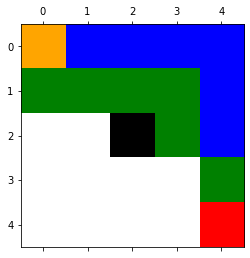

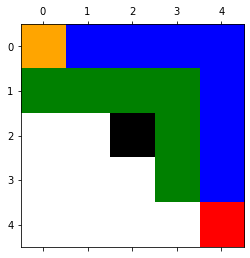

4 4
4 4
3 4
2 4
1 4
0 4
0 3
0 2
0 1
0 0
[0, 0]--[0, 1]--[0, 2]--[0, 3]--[0, 4]--[1, 4]--[2, 4]--[3, 4]--[4, 4]


In [ ]:
tog=1
ser(grd,st,goal,tog)

Puzzle

In [39]:
oren = {}
st_no = {}
cnt=0

def grd_str(grd):
  s=''
  for i in range(3):
    for j in range(3):
      s+=grd[i][j]
  return s
  
def str_grd(inp):
  grd=[['0' for i in range(3)] for j in range(3)]
  c=0
  for i in range(3):
    for j in range(3):
      grd[i][j]=inp[c]
      c+=1
  return grd

In [40]:
def lbl(grd):
  s=''
  for i in range(9):
    s+=grd[i]
  if (s not in st_no):
    global cnt
    st_no[s]=cnt
    oren[cnt]=s
    cnt+=1

def all_possible(grd,x,y):
  if(x!=y):
    i=x
    while(i<=y):
      grd[i],grd[x]=grd[x],grd[i]
      all_possible(grd,x+1,y)
      grd[i],grd[x]=grd[x],grd[i]
      i+=1
  else:
    lbl(grd)

all_possible(['s','s','1','2','3','4','5','6','7'],0,8)

In [41]:
hur={}
for i in range(cnt+1):
  hur[i]=0

In [42]:
vis = [0 for i in range(cnt+1)]
pred = [0 for i in range(cnt+1)]
d = [0 for i in range(cnt+1)]
pos = [0 for i in range(cnt+1)]
ind = [[-1,-1] for i in range(cnt+1)]

def hurist(fin):
  cur=grd_str(fin)
  for i in range(cnt):
    hur[i]=0
    s=oren[i]
    for j in range(9):
      if(cur[j]!='s'):
        for k in range(9):
          if(cur[j]==s[k]):
            l=abs(j-k)
            hur[i]+=(l%3) + (l/3)
            
dx=[1,0,-1,0]
dy=[0,1,0,-1]

In [43]:
def path(strt):
  l=0
  p=st_no[strt]
  if(vis[p]!=0):
    pat=[]
    while(p!=0):
      pat.append(p)
      p=pred[p]
    pat.reverse()
    for i in range(len(pat)):
      grd=str_grd(oren[pat[i]])
      l+=1
      print('Move the index:',ind[pat[i]])
      if(pos[pat[i]]==0):
        print('R')
      if(pos[pat[i]]==1):
        print('D')
      if(pos[pat[i]]==2):
        print('L')
      if(pos[pat[i]]==3):
        print('U')
      for j in range(3):
        print(grd[j])
  print('num of moves: ',l-1)

In [44]:
def puzzle(sou,fin):
  sou=grd_str(sou)
  fin=grd_str(fin)
  q=[]
  hp.heappush(q,[0,st_no[sou]])
  vis[st_no[sou]]=1
  d[st_no[sou]]=0
  condt=1
  
  while(len(q) and condt):
    z=hp.heappop(q)
    c,cur=z
    grd=str_grd(oren[cur])
    fr=[]
    for i in range(3):
      for j in range(3):
        if(grd[i][j]=='s'):
          fr.append([i,j])
    for i in range(2):
      x1,y1=fr[i]
      for j in range(4):
        x=x1+dx[j]
        y=y1+dy[j]
        if(x>=0 and y>=0 and x<3 and y<3 and grd[x][y]!='s'):
          newG = [[grd[i][j] for j in range(3)] for i in range(3)]
          newG[x1][y1],newG[x][y] = newG[x][y],newG[x1][y1]
          s=grd_str(newG)
          if(vis[st_no[s]]==0):
            pred[st_no[s]]=cur
            ind[st_no[s]]=[x,y]
            vis[st_no[s]]=1
            pos[st_no[s]]=j
            d[st_no[s]]=d[cur]+1
            hp.heappush(q,[hur[st_no[s]]+d[st_no[s]],st_no[s]])
            if(s==fin):
              condt=0
              return


In [45]:
strt =[['0' for i in range(3)] for j in range(3)]
print('starting position:')

for i in range(3):
  for j in range(3):
    strt[i][j]=input()

print('Enter goal orientation')
goal=[['0' for i in range(3)] for j in range(3)]
for i in range(3):
  for j in range(3):
    goal[i][j]=input()
      

starting position:
2
6
s
4
3
7
5
s
1
Enter goal orientation
1
2
3
4
5
6
7
s
s


In [46]:
hurist(goal)
puzzle(strt,goal)
path(grd_str(goal))

Move the index: [-1, -1]
R
['2', '6', 's']
['4', '3', '7']
['5', 's', '1']
Move the index: [0, 1]
U
['2', 's', '6']
['4', '3', '7']
['5', 's', '1']
Move the index: [2, 2]
D
['2', 's', '6']
['4', '3', '7']
['5', '1', 's']
Move the index: [1, 1]
R
['2', '3', '6']
['4', 's', '7']
['5', '1', 's']
Move the index: [2, 1]
R
['2', '3', '6']
['4', '1', '7']
['5', 's', 's']
Move the index: [2, 0]
U
['2', '3', '6']
['4', '1', '7']
['s', '5', 's']
Move the index: [1, 2]
L
['2', '3', '6']
['4', '1', 's']
['s', '5', '7']
Move the index: [0, 2]
L
['2', '3', 's']
['4', '1', '6']
['s', '5', '7']
Move the index: [0, 1]
U
['2', 's', '3']
['4', '1', '6']
['s', '5', '7']
Move the index: [0, 0]
U
['s', '2', '3']
['4', '1', '6']
['s', '5', '7']
Move the index: [1, 0]
L
['s', '2', '3']
['s', '1', '6']
['4', '5', '7']
Move the index: [1, 1]
D
['s', '2', '3']
['1', 's', '6']
['4', '5', '7']
Move the index: [2, 1]
R
['s', '2', '3']
['1', '5', '6']
['4', 's', '7']
Move the index: [2, 2]
D
['s', '2', '3']
['1', '5